# Shor's algorithm for errors correction

## Simulated backend

## Step 1. Map the problem

### Setup

In [1]:
# Qiskit imports
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Plotting routines
from qiskit.visualization import plot_distribution

In [2]:
# Code to run on a simulator:
 
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane()

### Create a circuit, simulating a bit flip error

In [3]:
# Create a new circuit with 9 qubits
# n qubit
n = 9
# Create a circuit with n+1 qubits
q = QuantumRegister(n, 'q')
c = ClassicalRegister(1, 'c')
qc= QuantumCircuit(q, c)

#qc.x(0)
# Shor code (left side)
qc.cx(0,3)
qc.cx(0,6)

qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)

qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)

# error block
qc.barrier()
# bit flip error
qc.x(0)
# phase flip error
#qc.z(0)
qc.barrier()
# end error block

# Shor code (right side)
qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)

qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)

qc.ccx(1,2,0)
qc.ccx(4,5,3)
qc.ccx(8,7,6)

qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0,3)
qc.cx(0,6)
qc.ccx(6,3,0)
# Measure
qc.measure(0,0)

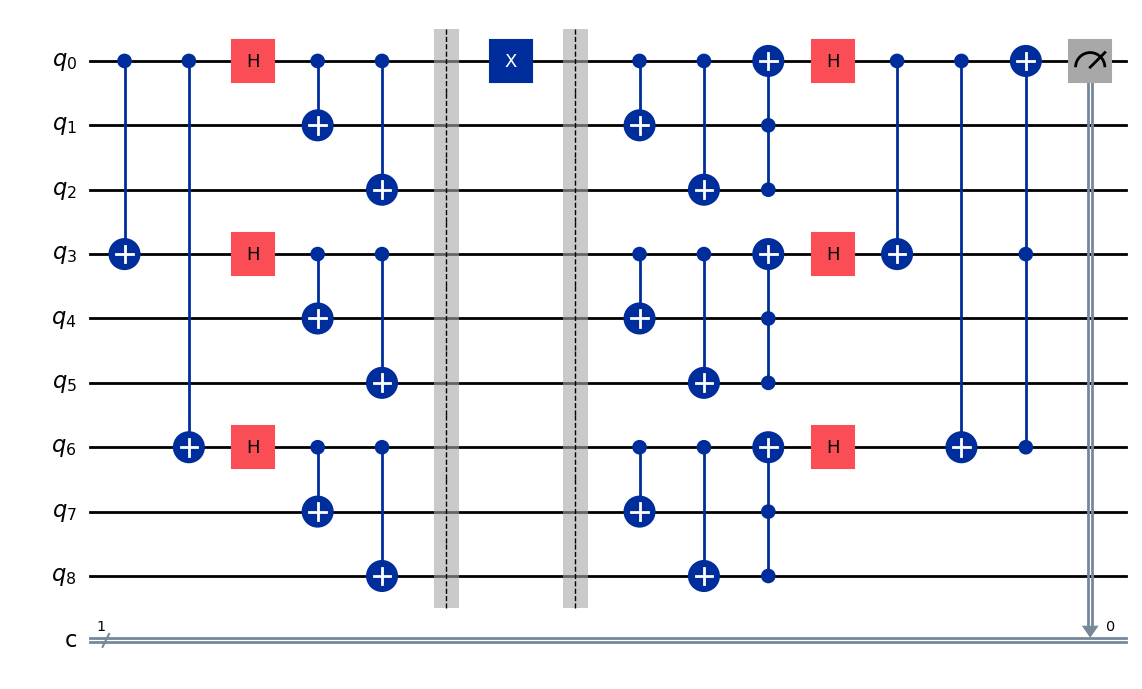

In [4]:
# Drawing the circuit
qc.draw("mpl")

## Step 2: Optimize the problem

### ISA circuit

In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

isa_circuit = pm.run(qc)
#isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

## Step 3. Execute using Qiskit primitives

In [6]:
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1_000
result = sampler.run([isa_circuit]).result()
dist = result[0].data.c.get_counts()

## Step 4. Post-process, return result in classical format

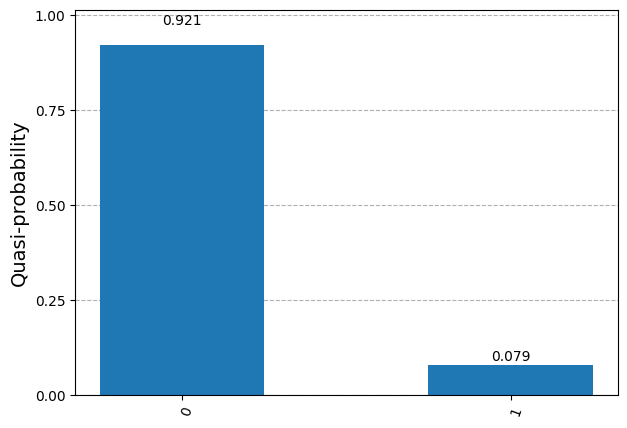

In [9]:
plot_distribution(dist)

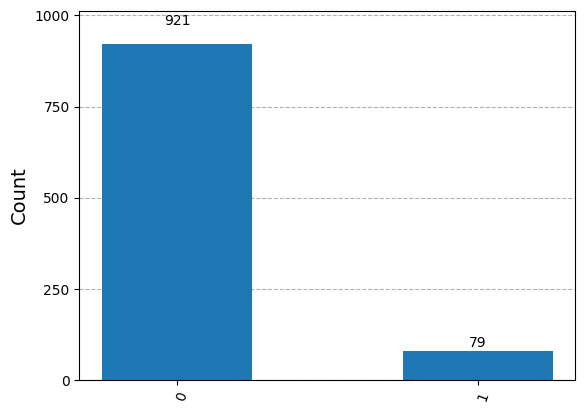

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(dist)